Скрипт для рендера блоков и всего уровня в игре Felix The Cat [NES]
--

In [19]:
from cadEditorPath import cadEditorDir
import os

РЕНДЕР ЛИНИЙ
--
Отрисовка линий

Загружаем классы из редактора CadEditor для загрузки данных о блоках и рендера nes-графики

In [3]:
import clr
clr.AddReference("CadEditor")
clr.AddReference("PluginVideoNes")
import System
from CadEditor import Globals, ConfigScript, MapViewType, UtilsGDI
from PluginVideoNes import Video

from IPython.display import display, Image
picPath = "D:/CadEditorPythonExamples/" #путь к папке для сохранения картинок

Загружаем конфиг для игры Felix (в нём указан способ загрузки блоков из ROM и их адрес), а также используем только что сохранённый дамп данных

In [12]:
LEVEL_NO = 0
configName = cadEditorDir + "settings_felix_the_cat/Settings_Felix_%d.cs"%(LEVEL_NO+1)
romName = os.path.join(cadEditorDir, "Felix the Cat (U) [!].nes")
dumpName = os.path.join(cadEditorDir, "settings_felix_the_cat/dump%d.bin"%(LEVEL_NO+1))
Globals.loadData(romName, dumpName, configName)

После успешной загрузки важные данные находятся в:<br>
<b>Globals.romdata</b> – массив байт загруженного ROM.<br>
<b>ConfigScript</b> – все функции загрузки данных из ROM и сохранения их обратно.

In [13]:
#Создаём экземляр плагина для отрисовки NES-графики
video = Video()

Построение блоков уровня

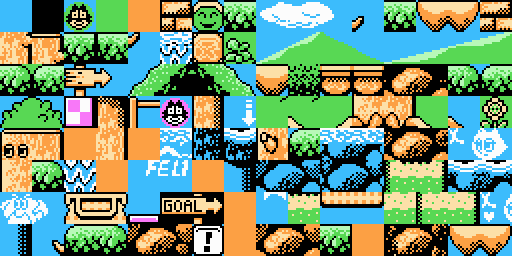

In [17]:
#clr не понимает перегруженных функций, поэтому явно задаём прототип функции, которую хотим вызвать
#Bitmap[] makeObjects(byte videoPageId, byte tilesId, byte palId, float scale, MapViewType drawType, int constantSubpal = -1);
makeObjects = video.makeObjects.Overloads[System.Byte, System.Byte, System.Byte, System.Single, MapViewType, System.Int32]
bb = makeObjects(0x90, 0, 0, 2.0, MapViewType.Tiles, -1)

blocks = System.Array[System.Drawing.Image](bb)
#Склейка линий вместе
blocksMap = UtilsGDI.GlueImages(blocks, 16, 8)
fn = picPath+"blocks0.png"
blocksMap.Save(fn)
display(Image(filename=fn))

Построение и склейка линий

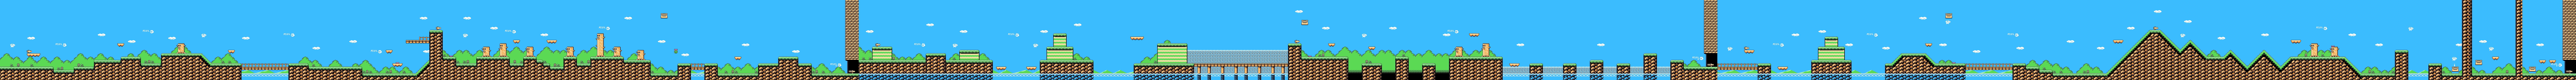

In [18]:
screen = Globals.dumpdata

#разворот одномерного массива из постолбцового описания в построчное
def transpose(m, w, h):
    result = [0]*(h*w)
    for i in xrange(w):
        for j in xrange(h):
            result[j * w + i] = m[i * h + j]
    return result

tiles = [bb[i] for i in transpose(screen, 256*3, 24)]
#конвертация в C#-массив
tiles = System.Array[System.Drawing.Image](tiles)
#Склейка линий вместе
tileImage = UtilsGDI.GlueImages(tiles, 256*3, 24)
fn = picPath+"level%d.png"%LEVEL_NO
tileImage.Save(fn)
display(Image(filename=fn))